In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
import glob
from collections import defaultdict
import sqlite3 as lite
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the field information
#root = "/home/esmee/Documents/DBDM/DDM2017-master/FinalProject/" 
root = "/disks/strw9/stoop/DBDM/DDM2017-master/FinalProject/Final-Project-DBDM/"

# FieldTable

| ID | FieldID | Filename | Filter | Exp time | MJD |


In [4]:
#Read the field info
field_info = pd.read_csv(root + 'file_info_for_problem.csv')

# Make the filters of the same form as for StarTable
for field in range(1,4):
    #Find the index of filter Ks
    index_ks = np.where( (field_info['FieldID'] == field) & (field_info['Filter'] == 'Ks') )[0]
    sort = np.argsort(field_info['MJD'][index_ks])
    
    #Change to Ks-E00..
    tel = 1
    for i in index_ks[sort]:
        field_info['Filter'][i] = field_info['Filter'][i] + '_E00'+str(tel)
        tel +=1

print field_info

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


# StarTable
| ID  | StarID  | FieldID | Ra  | Dec  | 

# IntensityTable
| ID | StarID | FieldID | Filter | Class | Flux1 | dFlux1 | Flux2 | dFlux2 | Flux3 | dFlux3 | Mag1 | dMag1 | Mag2 | dMag2 | Mag3 | dMag3 |

In [5]:
filenames = glob.glob(root + '*.fits')
starIDs = []
#Find the unique StarIDs
for i, f in enumerate(filenames):
    hdu = fits.open(f)
    [starIDs.append(ID) for ID in hdu[1].data['StarID']]

uniq_IDs = np.unique(starIDs)
nstars = len(uniq_IDs)

#Make the Star and Intensity table
scol = np.array(['ID', 'FieldID', 'StarID', 'Ra', 'Dec'])
icol = np.array(['ID', 'StarID', 'FieldID', 'Filter', 'Class','Flux1', 'dFlux1', 'Flux2', 'dFlux2', 'Flux3', 'dFlux3', 'Mag1', 'dMag1', 'Mag2', 'dMag2', 'Mag3', 'dMag3'])
StarTable = pd.DataFrame(data = np.zeros((nstars, len(scol))), columns = scol)
IntensityTable = pd.DataFrame(data = np.zeros((len(starIDs), len(icol))), columns = icol)

In [6]:
# Fill the tables
seen = []
first = False
for fname in filenames:
    
    print "Started with file {0}".format(fname.replace(root, ''))
    
    hdu = fits.open(fname)
    fname = fname.replace(root, '')
    sID = hdu[1].data['StarID'] #StarIDs
    fID = fname[6] #FieldID
    filt = fname[8:-5] # filter 
    if '-' in filt: filt = filt.replace('-','_')
    
    #Index in table of the stars
    sindex = [np.where(uniq_IDs == i)[0][0] for i in sID]
    
    # Is this field already seen
    if not sID[0] in seen:
        
        # Fill ID, FieldID 
        StarTable['ID'][sindex] = sindex
        StarTable['FieldID'][sindex] = fID
        # Fill StarID, Ra and Dec
        for c in scol[2:5]:
            StarTable[c][sindex] = hdu[1].data[c]
        
        [seen.append(ID) for ID in sID]
    
    if first == False:
        iindex = np.arange(len(sID))
        first = True
    else:
        iindex += len(sID)
    
    print filt, iindex[-1]
    
    # Fill the Intensity Table
    IntensityTable['ID'][iindex] = iindex
    IntensityTable['StarID'][iindex] = sID
    IntensityTable['Filter'][iindex] = filt
    
    IntensityTable['FieldID'][iindex] = fID
    
    # Fill in the flux and magnitudes in IntensityTable
    for c in icol[4:]:
        IntensityTable[c][iindex] = hdu[1].data[c]
    


Started with file Field-3-Ks-E002.fits


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Ks_E002 9999


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Started with file Field-3-Ks-E001.fits
Ks_E001 19999


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Started with file Field-2-H.fits


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


H 29999
Started with file Field-1-Ks-E001.fits
Ks_E001 39999
Started with file Field-2-Y.fits
Y 49999
Started with file Field-3-J.fits
J 59999
Started with file Field-1-Y.fits
Y 69999
Started with file Field-1-Ks-E003.fits
Ks_E003 79999
Started with file Field-1-Ks-E002.fits
Ks_E002 89999
Started with file Field-1-H.fits
H 99999
Started with file Field-3-H.fits
H 109999
Started with file Field-3-Z.fits
Z 119999
Started with file Field-2-Z.fits
Z 129999
Started with file Field-3-Y.fits
Y 139999
Started with file Field-1-Z.fits
Z 149999
Started with file Field-2-Ks-E001.fits
Ks_E001 159999
Started with file Field-2-J.fits
J 169999
Started with file Field-1-J.fits
J 179999


In [27]:
# write tables to csv
StarTable.to_csv(root+'StarTable.csv')
field_info.to_csv(root+'FieldTable.csv')
IntensityTable.to_csv(root + 'IntensityTable.csv')

In [63]:
# Read the Tables
FieldTable = pd.read_csv(root+ "FieldTable.csv")
StarTable = pd.read_csv(root+ "StarTable.csv")
IntensityTable = pd.read_csv(root + 'IntensityTable.csv')

FieldTable.drop('Unnamed: 0', axis=1, inplace=True)
StarTable.drop('Unnamed: 0', axis=1, inplace=True)
IntensityTable.drop('Unnamed: 0', axis=1, inplace=True)

# Make the database
con = lite.connect(root+"VVV.db")
StarTable.to_sql('StarTable', con, if_exists = 'replace')
FieldTable.to_sql('FieldTable', con, if_exists = 'replace')
IntensityTable.to_sql('IntensityTable', con, if_exists = 'replace')

# Perform the queries

**R1:** Find all images observed between MJD = 56800 and MJD = 57300 and give me the number of stars detected with S/N > 5 in each image.

In [3]:
con = lite.connect(root + 'VVV.db')

In [5]:
command1 = """SELECT f.Filename, COUNT(i.StarID) FROM FieldTable AS f \
            JOIN IntensityTable AS i \
                ON (f.FieldID = i.FieldID) AND (f.Filter = i.Filter) \
            WHERE (i.Flux1/i.dFlux1 > 5) AND (f.MJD BETWEEN 56800 AND 57300) 
                AND (i.Class = -1) \
            GROUP BY f.Filename"""

t1 = pd.read_sql(command1, con)

print "The images taken between 56800 and 57300 and the number of stars with S/N > 5 "
print t1.to_latex()

The images taken between 56800 and 57300 and the number of stars with S/N > 5 
\begin{tabular}{llr}
\toprule
{} &                             Filename &  COUNT(i.StarID) \\
\midrule
0  &   H-ADP.2017-01-18T11:58:35.780.fits &             7982 \\
1  &  H-ADP.2017-01-18T11:58:35.780b.fits &             7725 \\
2  &  H-ADP.2017-01-18T11:58:35.780c.fits &             8022 \\
3  &   J-ADP.2017-01-18T11:58:35.781.fits &             7022 \\
4  &  J-ADP.2017-01-18T11:58:35.781b.fits &             7354 \\
5  &  J-ADP.2017-01-18T11:58:35.781c.fits &             7248 \\
6  &  Ks-ADP.2016-05-25T15:33:43.377.fits &             7888 \\
7  &   Y-ADP.2017-01-18T11:58:36.901.fits &             6806 \\
8  &  Y-ADP.2017-01-18T11:58:36.901b.fits &             7215 \\
9  &  Y-ADP.2017-01-18T11:58:36.901c.fits &             7186 \\
10 &   Z-ADP.2017-01-18T11:58:36.905.fits &             6477 \\
11 &  Z-ADP.2017-01-18T11:58:36.905b.fits &             6929 \\
12 &  Z-ADP.2017-01-18T11:58:36.905c.fits &       

**R2:** Find the objects that have J-H > 1.5

In [7]:
command2 = """ SELECT ij.StarID, ij.Mag1 - ih.Mag1 AS 'J-H', ij.dMag1 + ih.dMag1 as 'd(J-H)'  
            FROM IntensityTable AS ij,  IntensityTable AS ih \
            WHERE (ij.StarID = ih.StarID)
                AND (ij.Filter = 'J') AND (ih.Filter = 'H') \
                AND ((ij.Mag1 - ih.Mag1 + ij.dMag1 + ih.dMag1 > 1.5) \
                OR (ij.Mag1 - ih.Mag1 - ij.dMag1 - ih.dMag1 > 1.5))"""

t2 = pd.read_sql(command2, con)

print "Objects with J-H > 1.5 are the following stars:"
print t2


Objects with J-H > 1.5 are the following stars:
         StarID       J-H    d(J-H)
0      300001.0  1.468517  0.063892
1      300002.0  1.487341  0.050819
2      300011.0  1.506544  0.020614
3      300012.0  1.528637  0.079586
4      300013.0  1.470833  0.272269
5      300014.0  1.335791  0.205654
6      300017.0  1.418943  0.215281
7      300024.0  1.564104  0.011978
8      300025.0  1.484015  0.029307
9      300030.0  1.531567  0.027574
10     300032.0  1.569456  0.019392
11     300034.0  1.350615  0.175401
12     300036.0  1.522264  0.108372
13     300038.0  1.348118  0.235803
14     300039.0  1.498812  0.042587
15     300040.0  1.459341  0.058187
16     300041.0  1.446539  0.090763
17     300042.0  1.524992  0.140247
18     300043.0  1.469644  0.032758
19     300046.0  1.449030  0.061920
20     300048.0  1.518841  0.166109
21     300049.0  1.382151  0.154416
22     300053.0  1.220301  0.467624
23     300058.0  1.573192  0.015191
24     300063.0  1.535267  0.039662
25     300064.0 

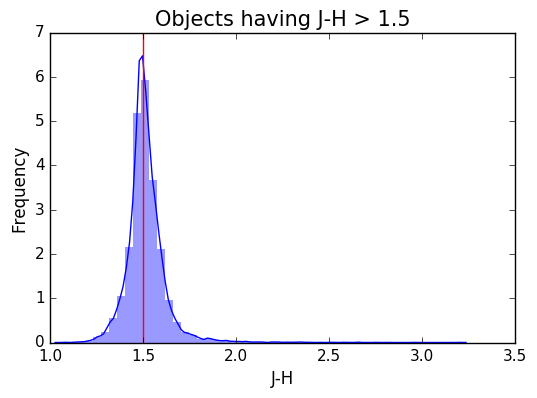

In [63]:
# Represent the data in a plot

ax = sns.distplot(t2['J-H'], hist_kws=dict(edgecolor="blue", linewidth=0, color='blue'))
ax.set_xlabel('J-H', size = 12)
ax.set_ylabel('Frequency', size=12 )
ax.set_title('Objects having J-H > 1.5', size=15)
ax.tick_params(labelsize = 11)
plt.axvline(1.5, color = 'red')
plt.savefig(root+"Plots/R2.pdf", format='pdf')
plt.show()


**R3** Find the objects where Ks difffers by more than 20 times the flux uncertainty from the mean flux

In [111]:
con = lite.connect(root + "VVV.db")

# Get the average of all the Ks epochs fluxes aperture 1 per StarID
command_avg = """SELECT StarID, AVG(Flux1) Average 
                FROM (SELECT StarID, Flux1 FROM IntensityTable WHERE Filter = 'Ks_E001' \
                    UNION ALL \
                    SELECT StarID, Flux1 FROM IntensityTable WHERE Filter = 'Ks_E002' \
                    UNION ALL \
                    SELECT StarID, Flux1 FROM IntensityTable WHERE Filter = 'Ks_E003') 
                GROUP BY StarID"""

# Get a table containing all the starIDs, Flux1, dFlux1 for all Ks filters
command_table = """SELECT StarID, Flux1, dFlux1 
                FROM (SELECT StarID, Flux1, dFlux1 FROM IntensityTable WHERE Filter = 'Ks_E001' \
                    UNION ALL\
                    SELECT StarID, Flux1, dFlux1 FROM IntensityTable WHERE Filter = 'Ks_E002' \
                    UNION ALL\
                    SELECT StarID, Flux1, dFlux1 FROM IntensityTable WHERE Filter = 'Ks_E003')\
                ORDER BY StarID"""

# Get the number of filters used to calculate the average per starID
# So stars images with Ks_E001 - Ks_E003 will have an idAmount 3
command_count_avg = """SELECT StarID, COUNT(*) AS idAmount
                FROM ({0})
                GROUP BY StarID""".format(command_table)

# Find the stars which have a difference of 20*dFlux1 between the average and the flux    
command_diff = """SELECT i.StarID AS StarID
            FROM ({0}) AS i\
            JOIN ({1}) AS i0 
                ON i0.StarID = i.StarID \
            WHERE (ABS(i.Flux1 - i0.Average) > i.dFlux1 * 20)""".format(command_table, command_avg)

# Find the number of filters per starID which will have the appropriate difference in fluxes
command_count_diff = """SELECT StarID, COUNT(*) AS idAmount
                    FROM ({0})
                    GROUP BY StarID""".format(command_diff)

# Return the starIDs for which all filters have a difference or more than 20*uncertainty by
# checking if the number of filters, for which we found the appropriate difference, is equal to 
#the amount of filters in which this star is observed.
command_final = """SELECT i.StarID 
                FROM ({0}) i \
                JOIN ({1}) AS nr 
                    ON nr.StarID = i.StarID
                WHERE (nr.idAmount = i.idAmount)""".format(command_count_diff, command_count_avg)

print "Found the following stars with a Ks flux 20 times above the uncertainty from the mean flux in Ks"
t3_1 = pd.read_sql(command_final, con)
print t3_1


Found the following stars with a Ks flux 20 times above the uncertainty from the mean flux in Ks
        StarID
0          8.0
1         21.0
2         42.0
3         54.0
4         62.0
5         67.0
6         70.0
7         74.0
8         77.0
9         81.0
10        83.0
11        86.0
12        87.0
13        94.0
14        96.0
15        97.0
16       100.0
17       109.0
18       118.0
19       129.0
20       133.0
21       138.0
22       147.0
23       150.0
24       153.0
25       154.0
26       163.0
27       168.0
28       175.0
29       180.0
...        ...
2824  309328.0
2825  309378.0
2826  309401.0
2827  309460.0
2828  309471.0
2829  309524.0
2830  309527.0
2831  309567.0
2832  309591.0
2833  309597.0
2834  309600.0
2835  309604.0
2836  309644.0
2837  309695.0
2838  309735.0
2839  309758.0
2840  309788.0
2841  309814.0
2842  309860.0
2843  309865.0
2844  309879.0
2845  309880.0
2846  309883.0
2847  309887.0
2848  309902.0
2849  309916.0
2850  309937.0
2851  309956.0
285

In [112]:
# Make the plot with the difference in terms of x * uncertainty

# Read in the data
sID = t3_1['StarID']
tFlux = pd.read_sql(command_table, con)
tAvg = pd.read_sql(command_avg, con)

# Normalise the data to the uncertainty
Diff = []
IDs = []
for ID in sID.values:
    diff = np.abs(tFlux['Flux1'][tFlux['StarID'] == ID].values - tAvg['Average'][tAvg['StarID'] == ID].values) / tFlux['dFlux1'][tFlux['StarID'] == ID].values
    [Diff.append(d) for d in diff]
    [IDs.append(ID) for d in diff]

IDs = np.array(IDs)
Diff = np.array(Diff)
df = np.vstack((IDs, Diff)).T
df = pd.DataFrame(df, columns = ['ID', 'Diff'])

# Plot the image

ax = sns.distplot(df['Diff'], rug=False, hist_kws=dict(edgecolor="blue", linewidth=0, color='blue'))
ax.set_xlabel("Difference in terms of uncertainty", size=12)
ax.set_ylabel("Frequency", size=12)
ax.set_title("Objects resulting from query R3", size=15)
ax.tick_params(labelsize = 11)
plt.axvline(20, color = 'red')
plt.savefig(root+"Plots/R3.pdf", format='pdf')

plt.show()


**R4** Find all catalogues that exist for a given field

In [69]:
con = lite.connect(root+"VVV.db")

# Perform the query and print for all fields
for i in range(1,4):
    Field = i
    command4 = """SELECT f.Filename FROM FieldTable AS f
                WHERE f.FieldID = {}""".format(str(Field))

    t4 = pd.read_sql(command4, con)

    print "Stars belonging to field {0} are:".format(str(Field))
    print t4.to_latex(index=False)

Stars belonging to field 1 are:
\begin{tabular}{l}
\toprule
                            Filename \\
\midrule
  Z-ADP.2017-01-18T11:58:36.905.fits \\
  J-ADP.2017-01-18T11:58:35.781.fits \\
  H-ADP.2017-01-18T11:58:35.780.fits \\
 Ks-ADP.2016-05-25T15:33:39.546.fits \\
 Ks-ADP.2017-01-18T11:58:39.907.fits \\
 Ks-ADP.2016-05-25T15:33:43.377.fits \\
  Y-ADP.2017-01-18T11:58:36.901.fits \\
\bottomrule
\end{tabular}

Stars belonging to field 2 are:
\begin{tabular}{l}
\toprule
                             Filename \\
\midrule
  Z-ADP.2017-01-18T11:58:36.905b.fits \\
  J-ADP.2017-01-18T11:58:35.781b.fits \\
  H-ADP.2017-01-18T11:58:35.780b.fits \\
 Ks-ADP.2016-05-25T15:33:39.546b.fits \\
  Y-ADP.2017-01-18T11:58:36.901b.fits \\
\bottomrule
\end{tabular}

Stars belonging to field 3 are:
\begin{tabular}{l}
\toprule
                             Filename \\
\midrule
  Z-ADP.2017-01-18T11:58:36.905c.fits \\
  J-ADP.2017-01-18T11:58:35.781c.fits \\
  H-ADP.2017-01-18T11:58:35.780c.fits \\
 Ks-ADP.2

**R5** For a given field I would like to retrieve the Y, Z, J, H and Ks magnitudes for all stars with S/N > 30 in Y, Z, J, H and Ks



In [104]:
con = lite.connect(root + 'VVV.db')

# Perform the query and print for all fields
Field=1
command5 = """SELECT iy.StarID, iy.Mag1 AS Y, iz.Mag1 AS Z, ij.Mag1 AS J, ih.Mag1 AS H, ik.Mag1 AS Ks, iy.FieldID AS Field
                FROM IntensityTable AS iy, IntensityTable AS iz, IntensityTable AS ij, IntensityTable AS ih
                JOIN (            
                    SELECT StarID, AVG(Flux1) AS Flux1, AVG(dFlux1) AS dFlux1, AVG(Mag1) AS Mag1, FieldID, 'Ks' AS Filter
                    FROM (
                        SELECT StarID, Flux1, dFlux1, Mag1, FieldID FROM IntensityTable WHERE Filter = 'Ks_E001' AND FieldID = {0} AND Class = -1
                        UNION ALL
                        SELECT StarID, Flux1, dFlux1, Mag1, FieldID FROM IntensityTable WHERE Filter = 'Ks_E002' AND FieldID = {0} AND Class = -1
                        UNION ALL
                        SELECT StarID, Flux1, dFlux1, Mag1, FieldID FROM IntensityTable WHERE Filter = 'Ks_E003' AND FieldID = {0} AND Class = -1
                        )
                    GROUP BY StarID
                    ) AS ik
                ON iy.StarID = ik.StarID
                WHERE (iy.StarID = iz.StarID) AND (iz.StarID = ij.StarID) AND (ij.StarID = ih.StarID)
                    AND (iy.Filter = 'Y') AND (iz.Filter = 'Z') AND (ij.Filter = 'J') AND (ih.Filter = 'H')
                    AND (iy.FieldID = {0}) AND (iz.FieldID = {0}) AND (ij.FieldID = {0}) AND (ih.FieldID = {0})
                    AND (iy.Class = -1) AND (iz.Class = -1) AND (ij.Class = -1) AND (ih.Class = -1)
                    AND (iy.Flux1/iy.dFlux1 > 30) AND (iz.Flux1/iz.dFlux1 > 30) AND (ij.Flux1/ij.dFlux1 > 30)
                    AND (ih.Flux1/ih.dFlux1 > 30)
                    AND (ik.Flux1/ik.dFlux1 > 30)""".format(str(Field))
t51 = pd.read_sql(command5, con)

Field=2
command5 = """SELECT iy.StarID, iy.Mag1 AS Y, iz.Mag1 AS Z, ij.Mag1 AS J, ih.Mag1 AS H, ik.Mag1 AS Ks, iy.FieldID AS Field
                FROM IntensityTable AS iy, IntensityTable AS iz, IntensityTable AS ij, IntensityTable AS ih
                JOIN (            
                    SELECT StarID, AVG(Flux1) AS Flux1, AVG(dFlux1) AS dFlux1, AVG(Mag1) AS Mag1, FieldID, 'Ks' AS Filter
                    FROM (
                        SELECT StarID, Flux1, dFlux1, Mag1, FieldID FROM IntensityTable WHERE Filter = 'Ks_E001' AND FieldID = {0} AND Class = -1
                        UNION ALL
                        SELECT StarID, Flux1, dFlux1, Mag1, FieldID FROM IntensityTable WHERE Filter = 'Ks_E002' AND FieldID = {0} AND Class = -1
                        UNION ALL
                        SELECT StarID, Flux1, dFlux1, Mag1, FieldID FROM IntensityTable WHERE Filter = 'Ks_E003' AND FieldID = {0} AND Class = -1
                        )
                    GROUP BY StarID
                    ) AS ik
                ON iy.StarID = ik.StarID
                WHERE (iy.StarID = iz.StarID) AND (iz.StarID = ij.StarID) AND (ij.StarID = ih.StarID)
                    AND (iy.Filter = 'Y') AND (iz.Filter = 'Z') AND (ij.Filter = 'J') AND (ih.Filter = 'H')
                    AND (iy.FieldID = {0}) AND (iz.FieldID = {0}) AND (ij.FieldID = {0}) AND (ih.FieldID = {0})
                    AND (iy.Class = -1) AND (iz.Class = -1) AND (ij.Class = -1) AND (ih.Class = -1)
                    AND (iy.Flux1/iy.dFlux1 > 30) AND (iz.Flux1/iz.dFlux1 > 30) AND (ij.Flux1/ij.dFlux1 > 30)
                    AND (ih.Flux1/ih.dFlux1 > 30)
                    AND (ik.Flux1/ik.dFlux1 > 30)""".format(str(Field))
t52 = pd.read_sql(command5, con)

Field=3
command5 = """SELECT iy.StarID, iy.Mag1 AS Y, iz.Mag1 AS Z, ij.Mag1 AS J, ih.Mag1 AS H, ik.Mag1 AS Ks, iy.FieldID AS Field
                FROM IntensityTable AS iy, IntensityTable AS iz, IntensityTable AS ij, IntensityTable AS ih
                JOIN (            
                    SELECT StarID, AVG(Flux1) AS Flux1, AVG(dFlux1) AS dFlux1, AVG(Mag1) AS Mag1, FieldID, 'Ks' AS Filter
                    FROM (
                        SELECT StarID, Flux1, dFlux1, Mag1, FieldID FROM IntensityTable WHERE Filter = 'Ks_E001' AND FieldID = {0} AND Class = -1
                        UNION ALL
                        SELECT StarID, Flux1, dFlux1, Mag1, FieldID FROM IntensityTable WHERE Filter = 'Ks_E002' AND FieldID = {0} AND Class = -1
                        UNION ALL
                        SELECT StarID, Flux1, dFlux1, Mag1, FieldID FROM IntensityTable WHERE Filter = 'Ks_E003' AND FieldID = {0} AND Class = -1
                        )
                    GROUP BY StarID
                    ) AS ik
                ON iy.StarID = ik.StarID
                WHERE (iy.StarID = iz.StarID) AND (iz.StarID = ij.StarID) AND (ij.StarID = ih.StarID)
                    AND (iy.Filter = 'Y') AND (iz.Filter = 'Z') AND (ij.Filter = 'J') AND (ih.Filter = 'H')
                    AND (iy.FieldID = {0}) AND (iz.FieldID = {0}) AND (ij.FieldID = {0}) AND (ih.FieldID = {0})
                    AND (iy.Class = -1) AND (iz.Class = -1) AND (ij.Class = -1) AND (ih.Class = -1)
                    AND (iy.Flux1/iy.dFlux1 > 30) AND (iz.Flux1/iz.dFlux1 > 30) AND (ij.Flux1/ij.dFlux1 > 30)
                    AND (ih.Flux1/ih.dFlux1 > 30)
                    AND (ik.Flux1/ik.dFlux1 > 30)""".format(str(Field))
t53 = pd.read_sql(command5, con)


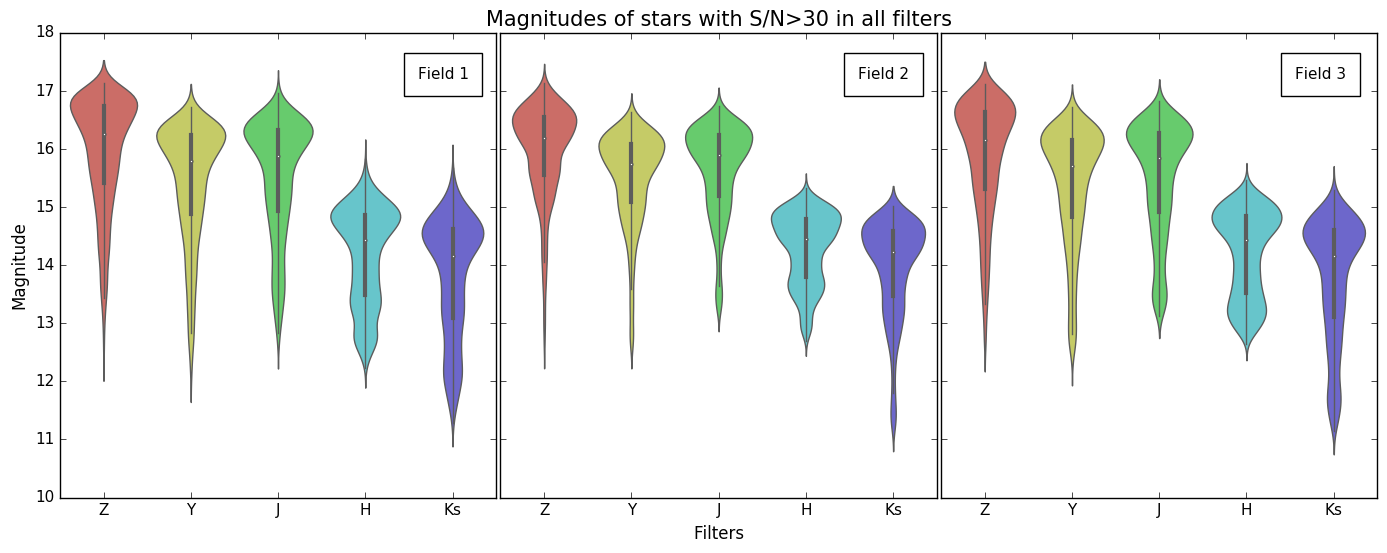

In [109]:
# Plot the results in a violin plot

f, (ax0, ax1, ax2) = plt.subplots(1,3, sharey = True, figsize=(17, 6))

sns.violinplot(data=t51[['Z', 'Y', 'J', 'H', 'Ks']], palette = sns.color_palette("hls", 6), ax=ax0)
sns.violinplot(data=t52[['Z', 'Y', 'J', 'H', 'Ks']], palette = sns.color_palette("hls", 6), ax=ax1)
sns.violinplot(data=t53[['Z', 'Y', 'J', 'H', 'Ks']], palette = sns.color_palette("hls", 6), ax=ax2)


ax0.set_ylabel('Magnitude', size=12)
ax0.tick_params(labelsize = 11)
ax0.text(3.6,17.2, 'Field 1', bbox={'pad':10, 'facecolor':'none'}, fontsize = 11)

ax1.tick_params(labelsize = 11)
ax1.set_xlabel('Filters', size=12)
ax1.text(3.6,17.2, 'Field 2', bbox={'pad':10, 'facecolor':'none'}, fontsize = 11)
ax1.set_title('Magnitudes of stars with S/N>30 in all filters', size = 15)

ax2.tick_params(labelsize = 11)
ax2.text(3.56,17.2, 'Field 3', bbox={'pad':10, 'facecolor':'none'}, fontsize = 11)
plt.subplots_adjust(wspace = .01)

#plt.tight_layout()
plt.savefig(root+"Plots/R5.pdf", format='pdf')

plt.show()

# Make the 100.000 sample stars in Y-J, J-H space

In [116]:
from astroML.density_estimation import XDGMM
import matplotlib.pyplot as plt

In [117]:
# Make two tables containing the colors
con = lite.connect(root + 'VVV.db')
command = "SELECT iy.Mag1 - ij.Mag1 AS 'Y-J', iy.dMag1 + ij.dMag1 AS 'dY-dJ', \
            ij.Mag1 - ih.Mag1 AS 'J-H', ij.dMag1 - ih.dMag1 AS 'dJ-dH'\
            FROM IntensityTable AS iy \
            JOIN IntensityTable AS ij \
                ON iy.StarID = ij.StarID \
            JOIN IntensityTable AS ih \
                ON ij.StarID = ih.StarID \
            WHERE (iy.Filter = 'Y') AND (ij.Filter = 'J') AND (ih.Filter = 'H') \
            AND (iy.Class = -1) AND (ij.Class = -1) AND (ih.Class = -1)"
t = pd.read_sql(command, con)

In [118]:
t

,Y-J,dY-dJ,J-H,dJ-dH
0,-0.107224,0.047650,1.464098,0.007697
1,-0.136801,0.160642,1.481058,0.027223
2,-0.180265,0.061174,1.489979,0.010696
3,-0.083078,0.020215,1.502807,0.003122
4,-0.184550,0.034584,1.455589,0.005150
5,-0.152714,0.204863,1.535143,0.035015
6,-0.164374,0.005598,1.115483,0.000346
7,-0.069810,0.008791,1.494721,0.001478
8,-0.181117,0.031629,1.455047,0.005402
9,-1.082779,0.003490,-0.006345,-0.002565


In [119]:
#Remove nans

delete = np.where(np.isnan(t))[0]
t = t.drop(t.index[delete])

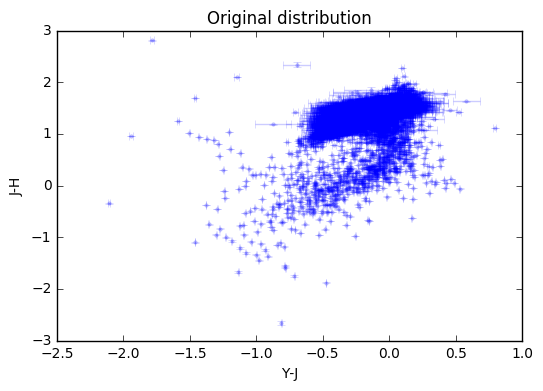

In [120]:
# The original distribution

plt.errorbar(t['Y-J'], t['J-H'], xerr=t['dY-dJ'], yerr = t['dJ-dH'], fmt='.', alpha = 0.2, ms=5)
plt.title("Original distribution")
plt.ylabel("J-H")
plt.xlabel("Y-J")
#plt.gca().invert_yaxis()
plt.show()

In [121]:
# Make the sample

# Changes the data to n_components x n_features
X = np.vstack([t['J-H'], t['Y-J']]).T
Xerr = np.zeros(X.shape + X.shape[-1:])
diag = np.arange(X.shape[-1])
Xerr[:, diag, diag] = np.vstack([t['dJ-dH'] ** 2, t['dY-dJ'] ** 2]).T

# Fit the model and make the samples
clf = XDGMM(n_components = 11, n_iter = 10)
clf.fit(X, Xerr)
sample = clf.sample(100000)

In [ ]:
# Plot the results

# The original distribution and samples
f, ax= plt.subplots(1)
#plt.errorbar(t['Y-J'], t['J-H'], xerr=t['dY-dJ'], yerr = t['dJ-dH'], fmt='.', alpha = 0.2)
ax.plot(t['Y-J'], t['J-H'], ls='none', color = 'blue', marker='.', alpha = 0.2, ms = 5, label = 'Original stars')
ax.plot(sample[:,1], sample[:,0], color = 'red', ls='none', marker = 'x', ms=2, label = "Simulated stars", alpha=0.5)
ax.set_title("Sampled and original distribution", size=15)
ax.set_xlabel("Y-J", size=12)
ax.set_ylabel("J-H", size=12)
ax.legend(loc = 4)
ax.tick_params(labelsize=11)
#plt.gca().invert_yaxis()

plt.savefig(root+'Plots/Samples.pdf',format='pdf')

plt.show()